https://www.youtube.com/watch?v=8Aw45HN5lnA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


# Defining functions

In [ ]:
#calculating the sample z-score
def Zcrit(sample_mean, H0_mean, s, n):
  zc = (sample_mean - H0_mean)*np.sqrt(n)/s

  return round(zc,3)

In [ ]:
#calculating statistics and plot

def H_test(zc, confidence_level=0.95):

  # Calculate the critical z-value for a two-tailed test
  z_critical = norm.ppf((1 + confidence_level) / 2)

  # Plotting the z-distribution
  x = np.linspace(-4, 4, 1000)
  y = norm.pdf(x)

  plt.figure(figsize=(7, 4))
  plt.plot(x, y, label='Z-Distribution')

  # Highlight the critical region
  plt.fill_between(x, 0, y, where=(x <= -z_critical) | (x >= z_critical), color='red',  label='Critical Region') #alpha=0.5,

  plt.axvline(x=zc, ymin=0.04, ymax=0.2, color ='blue', label='Zc-sample') #
  #plt.axvline(x=-zc, ymin=0.04, ymax=0.2, color ='blue') #ymax=1
  #plt.axhline(0)

  plt.title(f'Z-Distribution with Critical Region Highlighted (CI = {confidence_level*100}%)')
  plt.xlabel('Z')
  plt.ylabel('Probability Density')
  plt.legend()

  plt.show()

  # Display the critical z-value
  print(f"Critical z-value: ±{z_critical:.2f}")
  print(f"Sample z-value: ±{abs(zc):.2f}")

  #printing results
  if abs(zc) > abs(z_critical):
    print('Reject H0')
  else:
    print('Accept H0')

  print('\n')

  #Calculating the area above the distribution curve
  p_value_one_tail = 1 - norm.cdf(abs(zc))

  # If it's two-tailed, multiply by 2
  p_value_two_tailed = p_value_one_tail * 2

  #printing results
  print(f"P-value (one-tailed)-red area: {p_value_one_tail:.4f}")
  print(f"P-value (two-tailed): {p_value_two_tailed:.4f}")
  print(f"alpha : {1-confidence_level:.4f}")

# Calculating Hypotesis Test: problem 1, the smaple mean is equal or not to a value?

H0 => mean = 168 (Is it acceptable for the mean to be equal to this value?)

H1 => mean != 168

Sample:
* n = 36
* mean = 169.5
* s = 3.9

Confidence (CI) = 0.98

Significance (SI) = 1-0.98 = 0.02

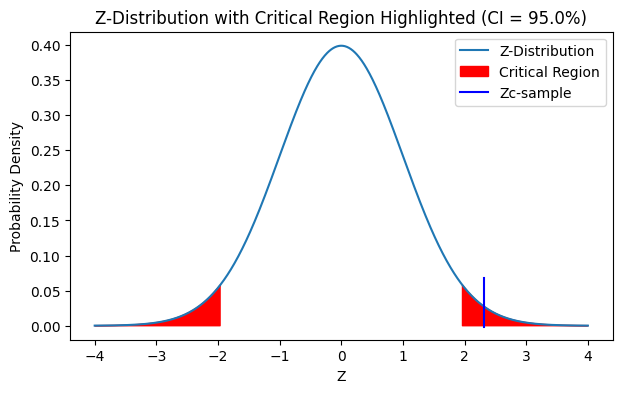

Critical z-value: ±1.96
Sample z-value: ±2.31
Reject H0


P-value (one-tailed)-red area: 0.0105
P-value (two-tailed): 0.0210
alpha : 0.0500


In [ ]:
zc1 = Zcrit(169.5, 168, 3.9, 36)
H_test(zc1, 0.95)

# Calculating Hypotesis Test: problem 2, the sample mean is equal or greater than a value?

H0 => mean >= 5 (Is it acceptable for the mean to be equal to **or greater than** this value?)

H1 => mean < 5


Sample
* n = 40
* mean = 4.8
* s = 3.9

Confidence Level (CL) = 0.95

Significance Level (SL) = 1-0.95 = 0.05

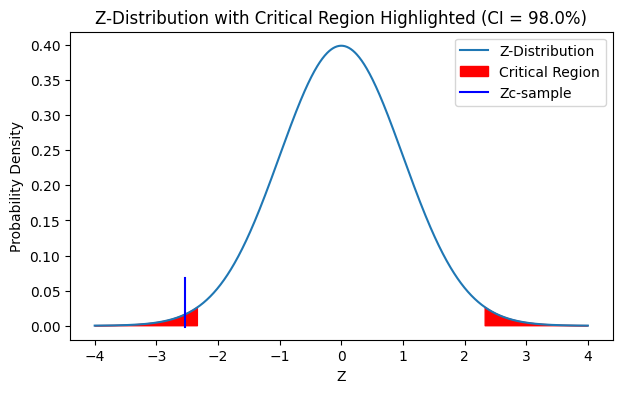

Critical z-value: ±2.33
Sample z-value: ±2.53
Reject H0


P-value (one-tailed)-red area: 0.0057
P-value (two-tailed): 0.0114
alpha : 0.0200


In [ ]:
zc2 = Zcrit(4.8, 5, 0.5, 40)
H_test(zc2, 0.98)

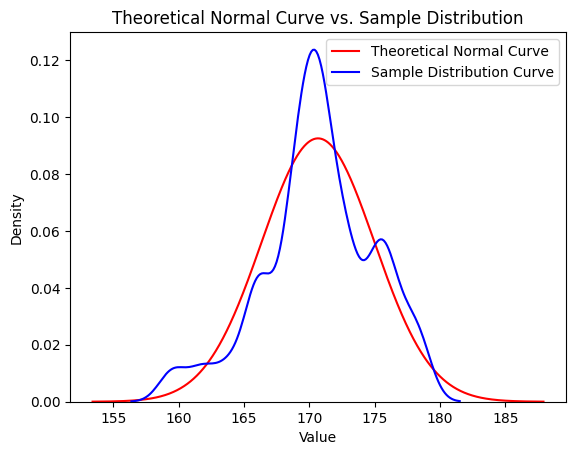

In [ ]:


# Sample data (replace this with your actual data)
np.random.seed(0)  # For reproducibility
sample_data = np.random.normal(loc=169.5, scale=3.9, size=36)

# Sample statistics
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)

# Theoretical normal distribution curve based on sample mean and std
x = np.linspace(sample_mean - 4*sample_std, sample_mean + 4*sample_std, 1000)
y = norm.pdf(x, sample_mean, sample_std)

# Plotting the theoretical curve
plt.plot(x, y, label='Theoretical Normal Curve', color='red')

# Plotting the sample distribution using KDE
sns.kdeplot(sample_data, bw_adjust=0.5, label='Sample Distribution Curve', color='blue')

# Plot customization
plt.title('Theoretical Normal Curve vs. Sample Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.show()
